In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()

C:\Users\Keerthi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [5]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [7]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [11]:
x=boston.data

In [12]:
y=boston.target

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)

In [14]:
x_train.shape

(339, 13)

In [15]:
y_train.shape

(339,)

In [16]:
x_test.shape

(167, 13)

In [17]:
y_test.shape

(167,)

In [18]:
lm=LinearRegression()

In [19]:
lm.fit(x_train,y_train)

LinearRegression()

In [20]:
lm.score(x_train,y_train)

0.7665529829880268

In [21]:
lm.coef_

array([-1.10843155e-01,  3.66995321e-02,  8.74460015e-03,  3.32218225e+00,
       -1.71846638e+01,  4.81511727e+00, -1.38022222e-02, -1.44146494e+00,
        2.63392383e-01, -1.17496784e-02, -9.25130518e-01,  9.07087108e-03,
       -4.12146398e-01])

In [22]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

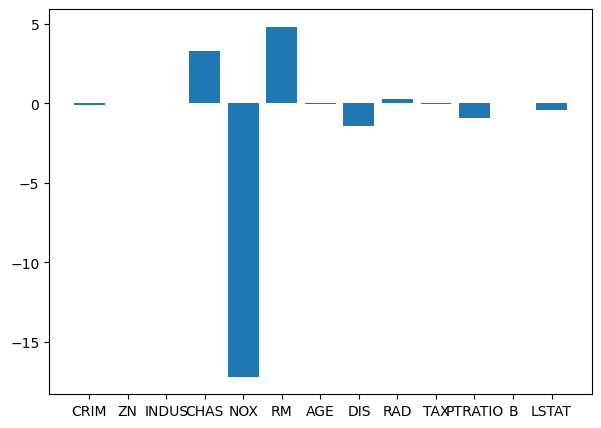

In [24]:
plt.figure(figsize=(7,5))
plt.bar(boston.feature_names,lm.coef_)
plt.show()

Regularization: L! and L2 lasso and ridge

In [25]:
from sklearn.linear_model import Lasso,Ridge

In [48]:
ls=Lasso(alpha=0.0001)

In [49]:
ls.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [50]:
ls.score(x_train,y_train)

0.7665529400345414

In [51]:
ls.coef_

array([-1.10824693e-01,  3.67066154e-02,  8.58729659e-03,  3.32038457e+00,
       -1.71509902e+01,  4.81528448e+00, -1.38318082e-02, -1.44099502e+00,
        2.63304303e-01, -1.17526095e-02, -9.24709393e-01,  9.07325563e-03,
       -4.12162696e-01])

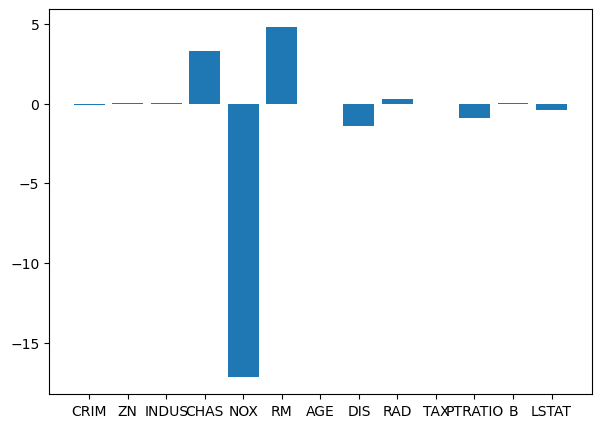

In [52]:
plt.figure(figsize=(7,5))
plt.bar(boston.feature_names,ls.coef_)
plt.show()

In [53]:
#minimize the coeff variance

rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.7665529828886577

In [54]:
rd.coef_

array([-1.10842268e-01,  3.66998800e-02,  8.73686616e-03,  3.32215005e+00,
       -1.71830063e+01,  4.81513570e+00, -1.38038984e-02, -1.44144307e+00,
        2.63388003e-01, -1.17498140e-02, -9.25109364e-01,  9.07099128e-03,
       -4.12146425e-01])

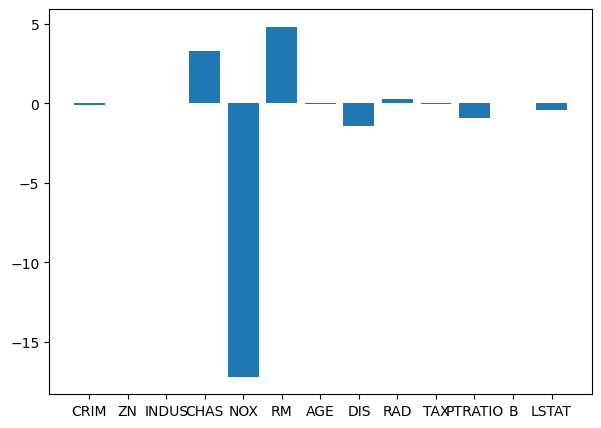

In [56]:
plt.figure(figsize=(7,5))
plt.bar(boston.feature_names,rd.coef_)
plt.show()

In [57]:
#ElasticNet to use both lasso and ridge


from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.0001)
en.fit(x_train,y_train)
en.score(x_train,y_train)

0.7665498739655398

In [59]:
enpred=en.predict(x_test)
en.coef_

array([-1.10686350e-01,  3.67611422e-02,  7.37727002e-03,  3.31588047e+00,
       -1.68916472e+01,  4.81825513e+00, -1.40961471e-02, -1.43758689e+00,
        2.62619134e-01, -1.17737697e-02, -9.21396641e-01,  9.09208744e-03,
       -4.12160129e-01])

In [66]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)


svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_y=svr.predict(x_test)


svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_y=svr.predict(x_test)

0.7390428007452163
0.21984205036201276
0.22924996554545518


In [65]:
from sklearn.svm import SVR


kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.7390428007452163
0.21984205036201276
0.22924996554545518
